<a href="https://colab.research.google.com/github/cartmarsh/TwitterSentiment/blob/main/neural_network_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Embeddings for Natural Language Processing

Outline:
- Download the Data
- Prepare Data for Training
- Logistic Regression Model
- Feed Forward Nueral Network


Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

## Download the Data

Upload your `kaggle.json` file to Colab

In [1]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!pwd

/content


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification

100% 6.03G/6.03G [03:29<00:00, 30.4MB/s]
100% 6.03G/6.03G [03:29<00:00, 31.0MB/s]


In [ ]:
import pandas as pd

1. csv files als panda frame laden
2. Das file anschauen und überlegen, was Daten sind die benötigt werden, schauen ob Daten redundant oder fehelerhaft sind (Ausreißer), müssen die Daten normalisiert werden? Vektorisiert?

In [ ]:
!ls


kaggle.json  quora-insincere-questions-classification.zip  sample_data


In [ ]:
!unzip quora-insincere-questions-classification.zip

Archive:  quora-insincere-questions-classification.zip
  inflating: embeddings.zip          
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls


embeddings.zip				      sample_data	     train.csv
kaggle.json				      sample_submission.csv
quora-insincere-questions-classification.zip  test.csv


In [ ]:
raw_df_train = pd.read_csv("./train.csv")
raw_df_test = pd.read_csv("./test.csv")

In [ ]:
raw_df_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


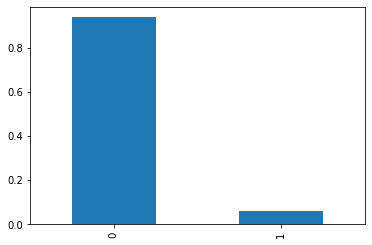

In [ ]:
raw_df_train.target.value_counts(normalize=True).sort_index().plot(kind="bar")

In [ ]:
raw_df_train.target.value_counts()



0    1225312
1      80810
Name: target, dtype: int64

In [ ]:
all_false = raw_df_train.target.loc[raw_df_train["target"].isin([0])]
all_true = raw_df_train.target.loc[raw_df_train["target"].isin([1])]
print(len(all_false), len(all_true))
perc_true = (all_false + all_true) / all_true
print("perc true: " + perc_true)

1225312 80810


UFuncTypeError: ignored



*   Now get the train_test data separated from target data
* Then we need inputs for the model and we need to split test and validation data, so that we can compare our different models 
* 


In [ ]:
test_X = raw_df_test.loc[:, "question_text"]
test_y = raw_df_train.loc[:, "target"]

In [ ]:
test_X[:50]

0     Why do so many women become so rude and arroga...
1     When should I apply for RV college of engineer...
2     What is it really like to be a nurse practitio...
3                                Who are entrepreneurs?
4      Is education really making good people nowadays?
5           How do you train a pigeon to send messages?
6                     What is the currency in Langkawi?
7     What is the future for Pandora, can the busine...
8     My voice range is A2-C5. My chest voice goes u...
9              How much does a tutor earn in Bangalore?
10    What are the best ways to save money for softw...
11                       What plant can I grow indoors?
12    Are military air traffic controllers FAA certi...
13         Why my answers not get any upvotes on Quora?
14            Whats a 1788 new hampshire quarter worth?
15    What are the best made pocket knives under $20...
16    Why is it that Trump supporters see him as a d...
17                               Can we eat huma

In [ ]:
test_y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
test_X[0]

'Why do so many women become so rude and arrogant when they get just a little bit of wealth and power?'

## Prepare Data for Training


Outline:
- Convert text to TF-IDF Vectors
- Split training & validation set
- Convert to PyTorch tensors

### Conversion to TF-IDF Vectors

In [10]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [11]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
###vectorizer = TfidVectorizer()

In [15]:
stemmer = SnowballStemmer(language="english")

In [16]:
stemmer.stem("going")

'go'

In [ ]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text)]

In [ ]:
from nltk.corpus import stopwords

### Split training and validation set

### Convert to PyTorch Tensors

## Logistic Regression Model

## Feed Forward Neural Network

## Make Predictions and Submit